In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
data_promo={
    'Experience_Years':[2,4,5,3,6,5],
    'Performance_Rating':[3,4,5,3,4,4],
    'Promoted':['No','Yes','Yes','No','Yes',None]
}
df=pd.DataFrame(data_promo)
print('Dataset:')
display(df)

Dataset:


,Experience_Years,Performance_Rating,Promoted
0,2,3,No
1,4,4,Yes
2,5,5,Yes
3,3,3,No
4,6,4,Yes
5,5,4,None


In [3]:
train_df=df.dropna()

In [4]:
train_df

,Experience_Years,Performance_Rating,Promoted
0,2,3,No
1,4,4,Yes
2,5,5,Yes
3,3,3,No
4,6,4,Yes


In [6]:
X=train_df[['Experience_Years','Performance_Rating']]
y=train_df['Promoted']

In [10]:
#create model
model=DecisionTreeClassifier()

In [11]:
#train model
model.fit(X,y)

DecisionTreeClassifier()

In [15]:
#predict
pred_promote=model.predict([[5,4]])
print('Promotion prediction',pred_promote[0])

Promotion prediction Yes


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


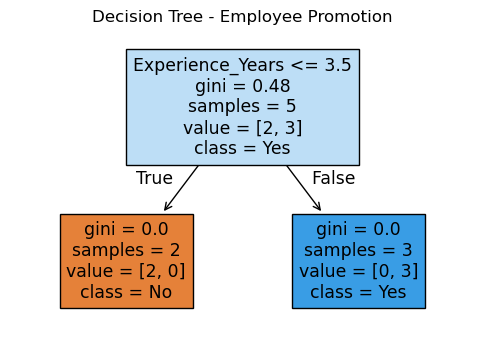

In [17]:
#visualization
plt.figure(figsize=(6,4))
plot_tree(model,
          feature_names=['Experience_Years','Performance_Rating'],
          class_names=['No','Yes'],
          filled=True)
plt.title('Decision Tree - Employee Promotion')
plt.show()

In [ ]:
# take the exp. years and performance rating from user and display promoted or not promoted using using prediction
# write code in this way, there should be no warning messages
# exp_years=
# per_rating=
# print('Promoted?')

In [20]:
exp_years = int(input("Enter years of experience: "))
per_rating = int(input("Enter performance rating (1-5): "))

new_predict=pd.DataFrame([[exp_years,per_rating]],columns=['Experience_Years','Performance_Rating'])

prediction = model.predict(new_predict)
print("Promoted?", prediction[0])

Enter years of experience:  4
Enter performance rating (1-5):  4


Promoted? Yes


In [33]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [34]:
data = {'Age':[25,30,45,35,22,40,50],
        'Income':['Low','Medium','High','Medium','Low','High','High'],
        'Buy':['No','No','Yes','Yes','No','Yes','Yes']
       }

In [39]:
df=pd.DataFrame(data)
df

,Age,Income,Buy
0,25,Low,No
1,30,Medium,No
2,45,High,Yes
3,35,Medium,Yes
4,22,Low,No
5,40,High,Yes
6,50,High,Yes


In [40]:
encoder=OneHotEncoder(sparse_output=False)
income_encoded=encoder.fit_transform(df[['Income']])
income_encoded_df=pd.DataFrame(income_encoded,columns=encoder.get_feature_names_out(['Income']))
income_encoded_df

,Income_High,Income_Low,Income_Medium
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0


In [41]:
label_encoder=LabelEncoder()
df['Buy']=label_encoder.fit_transform(df['Buy'])
df['Buy']               

0    0
1    0
2    1
3    1
4    0
5    1
6    1
Name: Buy, dtype: int64

In [42]:
df_encoded=pd.concat([df[['Age','Buy']],income_encoded_df], axis=1)
df_encoded

,Age,Buy,Income_High,Income_Low,Income_Medium
0,25,0,0.0,1.0,0.0
1,30,0,0.0,0.0,1.0
2,45,1,1.0,0.0,0.0
3,35,1,0.0,0.0,1.0
4,22,0,0.0,1.0,0.0
5,40,1,1.0,0.0,0.0
6,50,1,1.0,0.0,0.0


In [50]:
#to split the data (Buy in a seperate data)
X=df_encoded.drop('Buy',axis=1)
y=df_encoded['Buy']

In [51]:
model=DecisionTreeClassifier()

In [52]:
model.fit(X,y)

DecisionTreeClassifier()

In [54]:
sample = pd.DataFrame({'Age':[28],'Income':['Medium']})
sample_encoded=encoder.transform(sample[['Income']])

sample_encoded_df=pd.DataFrame(sample_encoded,columns=encoder.get_feature_names_out(['Income']))

sample_final=pd.concat([sample[['Age']],sample_encoded_df],axis=1)

prediction=model.predict(sample_final)
predicted_label=label_encoder.inverse_transform(prediction)

print('Prediction for Age=28, Income=Medium : ',predicted_label[0])

Prediction for Age=28, Income=Medium :  No


In [56]:
person_age=int(input('Enter Age'))
person_income=input('Enter category Low, Medium or High')
person=pd.DataFrame({'Age':[person_age],'Income':[person_income]})
person_encoded=encoder.transform(person[['Income']])

person_encoded_df=pd.DataFrame(person_encoded, columns=encoder.get_feature_names_out(['Income']))
person_final=pd.concat([person[['Age']],person_encoded_df], axis=1)

prediction=model.predict(person_final)
predicted_label=label_encoder.inverse_transform(prediction)

print(f'Prediction for Age = {person_age}, Income={person_income} : ',predicted_label[0])

Enter Age 28
Enter category Low, Medium or High High


Prediction for Age = 28, Income=High :  No


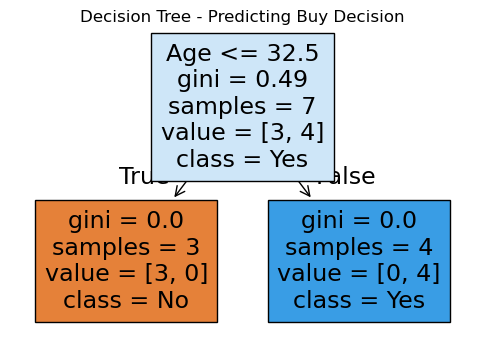

In [57]:
plt.figure(figsize=(6,4))
plot_tree(model,
          feature_names=X.columns,
          class_names=['No','Yes'],
          filled=True)
plt.title('Decision Tree - Predicting Buy Decision')
plt.show()

In [60]:
from sklearn.svm import SVC

df_spam = pd.read_csv('email_spam.csv')
print(df_spam)

df_spam_train = df_spam[df_spam['Spam']!='?']
X = df_spam_train[['Word_Frequency','Contains_Link']]
y = df_spam_train['Spam']

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X, y)

pred_spam = svm_model.predict([[0.5,1]])
print('Spam prediction:', pred_spam[0])

   Word_Frequency  Contains_Link Spam
0             0.8              1  Yes
1             0.1              0   No
2             0.6              1  Yes
3             0.2              0   No
4             0.5              1    ?
Spam prediction: Yes


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
